In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as cluster_hierarchy

from sklearn.cluster import AgglomerativeClustering

from matplotlib import pyplot as plt

In [2]:
path_base = Path(r'C:\Users\Tim\Documents\GitHub\NewsAnalysis\articles_aggregator\data\_data\consumer')

path_acticles = path_base / 'article_topic.parquet'
path_topics = path_base / 'topics.parquet'

In [3]:
df_acticles = pd.read_parquet(path_acticles)
df_topics = pd.read_parquet(path_topics)

display(df_acticles.head(3))
display(df_topics.head(3))

,url_id,time,header,tags,topic_id,embedding_document
0,b23592b8-a606-11eb-a4f5-caf8da9a5c2b-59821,2019-05-06 12:23:00,В новой серии «Игры престолов» заметили стакан...,[Сериалы],118,"[8.525235, -43.719246, 19.128325, -18.289577, ..."
1,b23592b8-a606-11eb-a4f5-caf8da9a5c2b-59824,2019-05-06 12:43:00,"«За одним столом сидят москвичи, киевляне и вс...","[футбол, визы, Погода]",30,"[5.974032, 100.825745, 107.21004, -592.38434, ..."
2,b23592b8-a606-11eb-a4f5-caf8da9a5c2b-59823,2019-05-06 12:43:00,Пункт пропуска на белорусско-польской границе ...,[Граница],37,"[16.169214, 18.579315, 23.806108, -15.191888, ..."


,topic_id,topic_size,topic_words
0,30,13606,"[матч, динамо, чемпионат, команда, сборная]"
1,28,5427,"[автомобиль, кроссовер, двигатель, машина, geely]"
2,31,3718,"[смартфон, galaxy, iphone, pro, xiaomi]"


In [4]:
f = lambda group: np.mean(group.to_list(), axis=0, dtype=float).tobytes()

embeddings = df_acticles.groupby('topic_id')['embedding_document'].agg(f).map(np.frombuffer)
topic_ids = embeddings.index.to_numpy()
embeddings = embeddings.to_list()
embeddings = np.array(embeddings)

embeddings.shape, topic_ids.shape

((140, 300), (140,))

In [34]:
topic_words = df_topics.set_index('topic_id')['topic_words'][topic_ids]
topic_words = topic_words.map(lambda words: ', '.join(words)).values

topic_words.shape, topic_words[:5]

((140,),
 array(['дождь, осадки, облачность, погода, pogodaby',
        'боровой, девелопмент, пирс, квартал, квартира',
        'hyundai, blue, creta, accent, сигарета',
        'wta, арина, соболенко, азаренко, саснович',
        'скидка, tамby, акция, руб, tamby'], dtype=object))

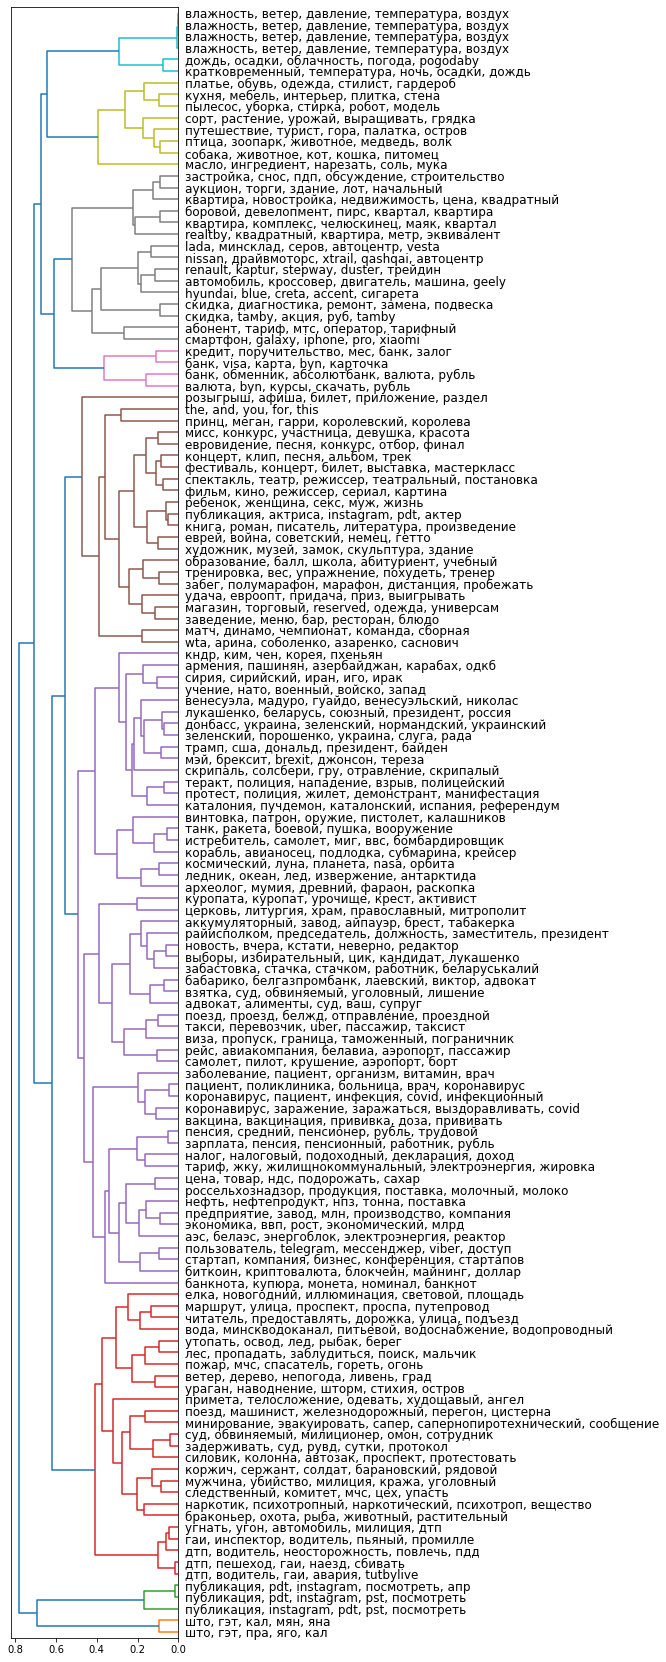

In [57]:
plt.figure(figsize=(3, 30))

linkage = cluster_hierarchy.linkage(embeddings, method='complete', metric='cosine', optimal_ordering=True)
dendrogram = cluster_hierarchy.dendrogram(linkage, labels=topic_words, orientation='left', leaf_font_size=12)

In [7]:
# clustering = AgglomerativeClustering(affinity='cosine', linkage='complete')

# clustering.fit(embeddings)

# clustering.labels_, clustering.children_

In [59]:
# linkage[:, [0, 1, 3]].astype(int)
# linkage.shape